# POV_Ray 6



---


# POV-RayとImageMagickの準備
0. povrayをaptコマンドでインストールします。

In [1]:
!apt install povray

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
The following additional packages will be installed:
  libsdl1.2debian povray-includes
Suggested packages:
  povray-doc povray-examples
The following NEW packages will be installed:
  libsdl1.2debian povray povray-includes
0 upgraded, 3 newly installed, 0 to remove and 27 not upgraded.
Need to get 1,723 kB of archives.
After this operation, 5,791 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic-updates/main amd64 libsdl1.2debian amd64 1.2.15+dfsg2-0.1ubuntu0.2 [175 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/universe amd64 povray amd64 1:3.7.0.4-2 [1,284 kB]
Get:3 http://archive.ubuntu.com/ubuntu bionic/universe amd64 povray-includes all 1:3.7.0.4-2 [264 kB]
Fetched 1,723 kB in 3s (668 kB/s)
Selecting previously un

1. POV-Rayで生成した画像を表示する関数(pshow)を準備します。
使用例： pshow('sample.png')



In [2]:
import cv2
import matplotlib.pyplot as plt

def pshow(filename):
    im = cv2.imread(filename)
    plt.imshow(cv2.cvtColor(im, cv2.COLOR_BGR2RGB))
    plt.show()

2. 生成されたpng画像からgif画像（アニメーション）を作成するために、imagemagick の convert をインストールします。

In [3]:
!apt install imagemagick

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
The following additional packages will be installed:
  fonts-droid-fallback fonts-noto-mono ghostscript gsfonts
  imagemagick-6-common imagemagick-6.q16 libcupsfilters1 libcupsimage2
  libdjvulibre-text libdjvulibre21 libgs9 libgs9-common libijs-0.35
  libjbig2dec0 liblqr-1-0 libmagickcore-6.q16-3 libmagickcore-6.q16-3-extra
  libmagickwand-6.q16-3 libnetpbm10 libwmf0.2-7 netpbm poppler-data
Suggested packages:
  fonts-noto ghostscript-x imagemagick-doc autotrace cups-bsd | lpr | lprng
  enscript gimp gnuplot grads hp2xx html2ps libwmf-bin mplayer radiance
  sane-utils texlive-base-bin transfig ufraw-batch inkscape libjxr-tools
  libwmf0.2-7-gtk poppler-utils fonts-japanese-mincho | fonts-ipafont-mincho
  fonts-japanese-gothic | fonts-ipafont-gothic fonts-arp



---



# ６章

In [4]:
%%file 6_animation1.pov
// 6_animation1.pov 
//  
// Initial_Frame=0 Final_Frame=10
//   


#include "colors.inc"        
#include "shapes.inc"    
#include "stones.inc"

background{color White}     

camera {
  location <0, 0, -5>
  look_at <0, 0, 0>
}

light_source {
  <5,5,-10>
  color White
}

cylinder {
  <0, 2.0, 0>, <0,-2.0, 0>, 0.8
  texture {T_Stone2}
  rotate <0,180*clock,0>
}

Writing 6_animation1.pov


In [5]:
!povray 6_animation1.pov +Q11 +A +FN +H240 +W320 Initial_Frame=0 Final_Frame=10 &> /dev/null

In [6]:
!convert 6_animation1??.png 6_animation1.gif
!convert 6_animation100.png 6_animation1.jpg

In [7]:
!ls -l *.gif

-rw-r--r-- 1 root root 158987 Oct 21 02:28 6_animation1.gif


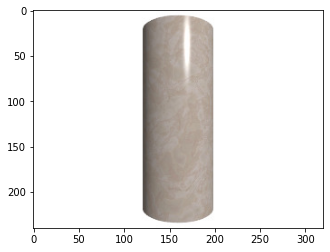

In [8]:
pshow('6_animation1.jpg')

In [9]:
# '''以下のコマンドでファイルを消去できます。'''
!rm 6_animation1??.png

In [10]:
# ```以下のコマンドでファイルをダウンロードできます。```
# from google.colab import files
# files.download("6_animation1.gif")



---



In [11]:
%%file 6_animation2.pov
// 6_animation2.pov

#include "colors.inc"        
#include "shapes.inc"    
#include "stones.inc"

background{color White} 

camera {
  location <0, 0, -5>
  look_at <0, 0, 0>
}

light_source {
  <5,5,-10>
  color White
}

cylinder {
  <0, 1.0, 0>, <0,-1.0, 0>, 0.8
  pigment {color rgb<0.0, 1.0, clock> }
}

Writing 6_animation2.pov


In [12]:
!povray 6_animation2.pov +Q11 +A +FN +H240 +W320 Initial_Frame=0 Final_Frame=10 &> /dev/null

In [13]:
!convert 6_animation2??.png 6_animation2.gif
!convert 6_animation200.png 6_animation2.png

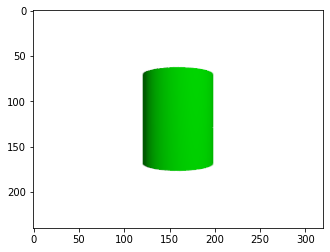

In [14]:
pshow('6_animation2.png')

In [15]:
# '''以下のコマンドでファイルを消去できます。'''
!rm 6_animation2??.png



---



In [16]:
%%file 6_animation3.pov
// 6_animation3.pov

#include "colors.inc"        
#include "shapes.inc"    
#include "stones.inc"    
#include "glass.inc"
#include "textures.inc"  
                             
                             
background{color White}      

camera {
  angle    35
  location <3.0 , 0.0 ,-10.0>
  right    x*image_width/image_height
  look_at  <0.0 , 0.0, 0.0>
  rotate   <0,-360*(clock+0.10),0>      
}

light_source {
  <5,5,-10>
  color White
}
 
plane { <0, 1, 0>, -1
    pigment {
      checker color White, color Blue
    }
}   

sphere {
  <+2, 0, 0>  0.4     
  material{M_Ruby_Glass}
} 

cylinder {
  <0, 1.0, 0>, <0,-1.0, 0>, 0.8
  pigment {color rgb<0.0, 1.0, clock> }
}

Writing 6_animation3.pov


In [17]:
!povray 6_animation3.pov +Q11 +A +FN +H240 +W320 Initial_Frame=0 Final_Frame=10 &> /dev/null

In [18]:
!convert 6_animation3??.png 6_animation3.gif
!convert 6_animation300.png 6_animation3.png

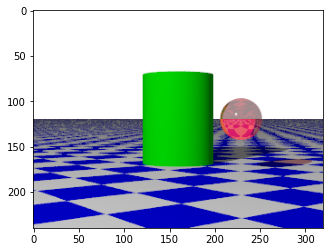

In [19]:
pshow('6_animation3.png')

In [20]:
# '''以下のコマンドでファイルを消去できます。'''
!rm 6_animation3??.png



---



In [21]:
%%file 6_animation4.pov
// 6_animation4.pov

#include "colors.inc"        
#include "shapes.inc"    
#include "stones.inc"    
#include "glass.inc"
#include "textures.inc"  
                        
                        
#macro  Bounce( X )
 #if(X<1/2) (sin(pi*( X + 1/2)))
 #else      (sin(pi*(1-X + 1/2)))
 #end
#end 
#declare Time = clock +0.00  ;
                        
                        
background{color White}
  
camera {
  location <0, 0, -6>
  look_at <0, 0, 0>
}

light_source {
  <5,5,-10>
  color White
}
 
plane { <0, 1, 0>, -0.5
    pigment {
      checker color White, color Blue
    }
} 

sphere{ <0,0,0>,0.5
  texture{
    pigment{ color rgb<0.5,0.5,0.0>}
    finish{ phong 1 }
    }
  translate
  <0.0, Bounce(Time)*(2.0),0.0>
}

Writing 6_animation4.pov


In [22]:
!povray 6_animation4.pov +Q11 +A +FN +H240 +W320 Initial_Frame=0 Final_Frame=10 &> /dev/null

In [23]:
!convert 6_animation4??.png 6_animation4.gif
!convert 6_animation400.png 6_animation4.png

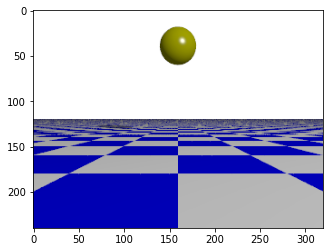

In [24]:
pshow('6_animation4.png')

In [25]:
# '''以下のコマンドでファイルを消去できます。'''
!rm 6_animation4??.png



---



In [26]:
%%file 6_while_loop1.pov
// 6_while_loop1.pov
#include "colors.inc"   


camera {
  location  <0.0, 1.0, -5.0>
  look_at   <0.0, 0.0,  0.0>
}     

light_source {
  <150, 150, -100>
  color rgb 1.0
}

#declare Value = -2;
#while ( Value <= 2 )  

  sphere { 
    <0, 0, 0>, 0.5 
    pigment { Blue }
    translate <Value, 0, 0> 
  }   

  #declare Value = Value + 1;
#end


Writing 6_while_loop1.pov


In [27]:
!povray 6_while_loop1.pov +Q11 +A +FN +H240 +W320 &> /dev/null

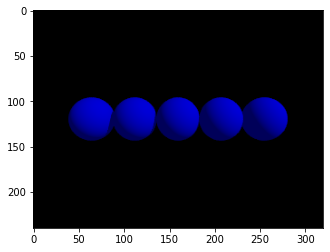

In [28]:
pshow('6_while_loop1.png')



---



In [29]:
%%file 6_while_loop2.pov
// 6_while_loop2.pov

#include "colors.inc"
#include "shapes.inc"
#include "skies.inc"
#include "textures.inc"
#include "woods.inc"
#include "stones.inc"                                        
#include "glass.inc"
#include "metals.inc"       

background {color Gray}
              
camera{ 
  location <0.0, -10.0, -25.0> 
  look_at  <0.0, 0.0, 0.0>
}               

light_source { 
  <5.0,5.0,-5.0> 
  color rgb <1.0, 1.0, 1.0>
}
   
      
#declare i=-10;
#while(i<=10)

  #declare j=-10;
  #while(j<=10) 

    sphere{
      <0.0,0.0,0.5>,0.3
      pigment{color Green}
      translate<i,j,0>
    }

    #declare j=j+1;
    #end  

  #declare i=i+1; 
#end

Writing 6_while_loop2.pov


In [30]:
!povray 6_while_loop2.pov +Q11 +A +FN +H240 +W320 &> /dev/null

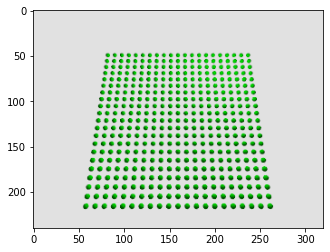

In [31]:
pshow('6_while_loop2.png')



---



In [32]:
%%file 6_while_loop3.pov
// 6_while_loop3.pov

#include "colors.inc"
#include "shapes.inc"
#include "skies.inc"
#include "textures.inc"
#include "woods.inc"
#include "stones.inc"                                        
#include "glass.inc"
#include "metals.inc"

background {color Gray}
              
camera{ 
  location <0.0, 0.0, -20.0> 
  look_at  <0.0, 0.0, 0.0>
}               

light_source { 
  <5.0,5.0,-5.0> 
  color rgb <1.0, 1.0, 1.0>
}
   
      
#declare i=0;
#while(i<100)    

  sphere{
    <0.0,0.0,0.5>,0.2
    pigment{color Green}
    rotate<0,40*i,0>
    translate<0,0.2*i,0>
  }  

  #declare i=i+1; 
#end

Writing 6_while_loop3.pov


In [33]:
!povray 6_while_loop3.pov +Q11 +A +FN +H240 +W320 &> /dev/null

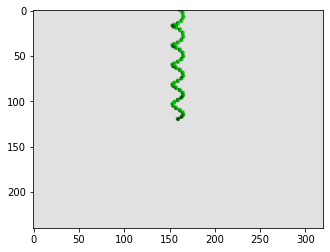

In [34]:
pshow('6_while_loop3.png')



---



In [35]:
%%file 6_example.pov
// 6_example.pov
// ---------------------------------             
//  
// Initial_Frame=0 Final_Frame=10
// 
// ---------------------------------      
               
#include "colors.inc"  
#include "skies.inc"  
#include "shapes.inc"
#include "textures.inc"
#include "woods.inc"
#include "stones.inc"                                        
#include "glass.inc"
#include "metals.inc" 
#include "shapes.inc"


camera {
  location  <0.0, 0.0, -5.0>
  look_at   <0.0, 0.0,  0.0>  
  right x*image_width/image_height
}

light_source {
  <0, 0, -15>
  color rgb <1.0, 1.0, 1.0>
}  
     
          
sky_sphere{
 S_Cloud2
}     
  
plane { <0, 1, 0>, -1
  pigment {
    checker color White, color Blue
  }
}   
      
sphere{
  <0.0, 1.0,0> 0.2
  texture{Ruby_Glass}
  translate <-1.0+clock*2.0,-1.2,-3.0>   
}         
       
torus{
  2.0,
  0.02
  texture{Pine_Wood} 
                   
  #if (clock<=0.5)   
     rotate <0,180*clock,-30*clock>
     translate <0,0.5,0> 
  #else
    rotate <0,180*clock,-30*(1-clock)>
    translate <0,0.5,0>   
  #end
}    


union { 
  cone {
    <0.0, -2.0, 0>, 1.0    
    <0.0, 1.5,0>,0.1 
    texture{Rosewood}      
  }
  
  sphere{
    <0.0, 1.0,0> 0.6  
    scale <1+clock*0.5, 1, 1+clock*0.5>  
    texture{T_Copper_4A} 
  }
}

Writing 6_example.pov


In [36]:
!povray 6_example.pov +Q11 +A +FN +H240 +W320 Initial_Frame=0 Final_Frame=10 &> /dev/null

In [37]:
!convert 6_example??.png 6_example.gif
!convert 6_example00.png 6_example.png

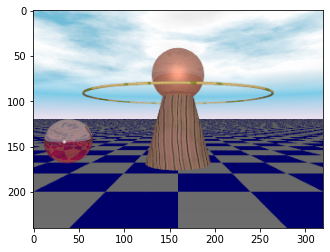

In [38]:
pshow('6_example.png')

In [39]:
# '''以下のコマンドでファイルを消去できます。'''
!rm 6_example??.png



---



In [40]:
!ls -l *.gif

-rw-r--r-- 1 root root 158987 Oct 21 02:28 6_animation1.gif
-rw-r--r-- 1 root root  53927 Oct 21 02:28 6_animation2.gif
-rw-r--r-- 1 root root 200599 Oct 21 02:28 6_animation3.gif
-rw-r--r-- 1 root root 140808 Oct 21 02:29 6_animation4.gif
-rw-r--r-- 1 root root 327529 Oct 21 02:29 6_example.gif




---
### 10/2022
